In [1]:
using QuadraticTeamDecisionSolver, Statistics, LinearAlgebra, Plots

In [2]:
m = 100000;
μ = 0.0;
σ = 1.0;

In [3]:
H(N) = [[sampleComplexNormal(μ, σ, N) for _ in 1:m] for i in 1:2] #only need 2

H (generic function with 1 method)

In [33]:
σᵣ = 10 .^ range(-10, stop=10, length=300);

In [34]:
function bound(N, σ)
    C = H(N)
    B = sqrt(Statistics.mean([abs( dot(h1, h2) / (dot(h1, h1) + σ))^2 for (h1, h2) in zip(C[1], C[2])]))
    return sqrt(N*((N-1)*B)^2)
end

bound (generic function with 1 method)

In [35]:
bounds = [bound.(N, σᵣ) for N in 2:15];

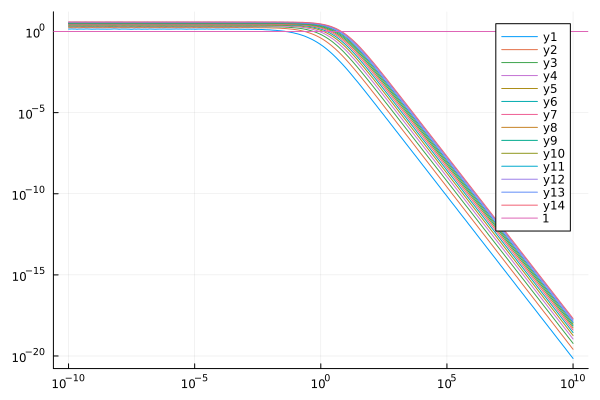

In [36]:
p1 = plot(σᵣ, bounds,xscale=:log10, yscale=:log10)
hline!(p1, [1], label="1")

In [37]:
indeces = [findfirst(x -> x <= 1, b) for b in bounds]

14-element Vector{Int64}:
 130
 142
 147
 150
 153
 155
 156
 158
 159
 160
 161
 162
 163
 163

In [38]:
min_sigmas = [σᵣ[i] for (b,i) in zip(bounds, indeces)]

14-element Vector{Float64}:
 0.04253657732750387
 0.2700462352420683
 0.5832923594286203
 0.9258810253973954
 1.4696843861124462
 1.999877270535286
 2.332883097864157
 3.1744774091091927
 3.70306958400514
 4.319679297334174
 5.0389626250651505
 5.878016072274914
 6.85678293664174
 6.85678293664174

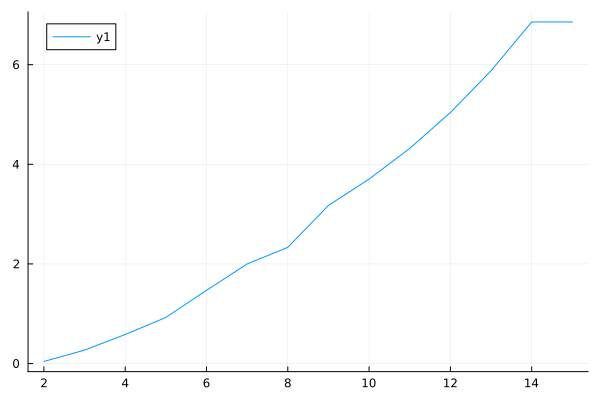

In [39]:
plot(2:15, min_sigmas)